In [1]:
import importlib
import pandas as pd
import utils

In [2]:
importlib.reload(utils)

<module 'utils' from '/Users/nicolearitranair/ml-basics/notebook/utils.py'>

In [3]:
import numpy as np

df = utils.get_customer_segmentation_data()
df

,Customer_ID,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,Education,Country,HasCrCard,Transaction_Count,Avg_Transaction_Value,EstimatedSalary
984,985,45,F,804,6,125327.133369,4,6,FRA,0,4,185.503530,123032.189574
716,717,24,F,363,0,1987.817483,1,2,BE,0,1,49.880288,22136.581951
95,96,23,M,393,1,1751.191551,1,2,BG,0,1,48.833531,41536.936995
796,797,50,F,810,5,138543.117157,4,5,ES,0,4,253.089967,126192.956717
40,41,48,F,820,5,103312.772302,3,5,PL,0,4,282.102192,102904.557987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,553,67,M,824,9,191841.429416,6,6,CAN,1,4,472.952673,141177.945440
910,911,64,M,780,9,194708.079825,5,6,AT,1,4,462.179695,144968.999826
807,808,53,F,844,6,124016.148607,4,5,PL,0,4,270.495098,100790.500540
625,626,42,F,820,6,109964.806502,4,6,EE,0,4,221.990326,136632.728854


In [4]:
df.to_csv("output_data/customer-segmentation-data.csv")

In [5]:
df

,Customer_ID,Age,Gender,CreditScore,Tenure,Balance,NumOfProducts,Education,Country,HasCrCard,Transaction_Count,Avg_Transaction_Value,EstimatedSalary
984,985,45,F,804,6,125327.133369,4,6,FRA,0,4,185.503530,123032.189574
716,717,24,F,363,0,1987.817483,1,2,BE,0,1,49.880288,22136.581951
95,96,23,M,393,1,1751.191551,1,2,BG,0,1,48.833531,41536.936995
796,797,50,F,810,5,138543.117157,4,5,ES,0,4,253.089967,126192.956717
40,41,48,F,820,5,103312.772302,3,5,PL,0,4,282.102192,102904.557987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,553,67,M,824,9,191841.429416,6,6,CAN,1,4,472.952673,141177.945440
910,911,64,M,780,9,194708.079825,5,6,AT,1,4,462.179695,144968.999826
807,808,53,F,844,6,124016.148607,4,5,PL,0,4,270.495098,100790.500540
625,626,42,F,820,6,109964.806502,4,6,EE,0,4,221.990326,136632.728854


In [6]:
df_to_cluster_normalize  = df.iloc[:,1:].copy()

continuous_columns = ["Age", "CreditScore", "Tenure", "Balance", "NumOfProducts", "Transaction_Count", "Avg_Transaction_Value", "EstimatedSalary"]

for col in continuous_columns:
    print(col)
    #rescale the continuous data
    df_to_cluster_normalize[col] = (df_to_cluster_normalize[col]-df_to_cluster_normalize[col].min())/(df_to_cluster_normalize[col].max()-df_to_cluster_normalize[col].min())

Age
CreditScore
Tenure
Balance
NumOfProducts
Transaction_Count
Avg_Transaction_Value
EstimatedSalary


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 5183.090105758608
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 5183.090105758608
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 5183.090105758608
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 5183.090105758608
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 5183.090105758608
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 1730.1667534567632
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 859, ncost: 2117.3

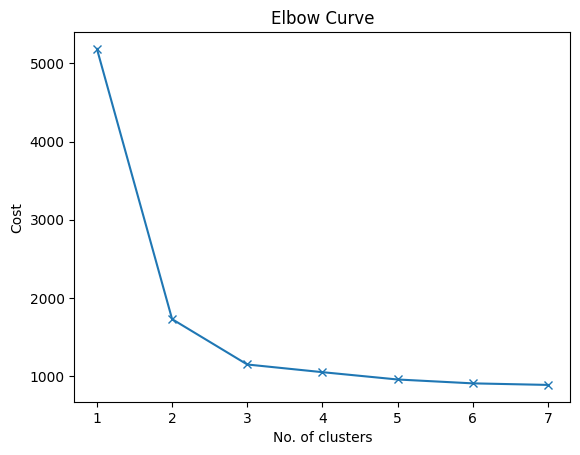

In [8]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
# Elbow curve to find optimal K 

cost = [] 
kmode_models = []
K = [1, 2, 3, 4, 5, 6, 7]
for k in list(K): 
    kmode = KPrototypes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(df_to_cluster_normalize, categorical=[1, 6, 7, 8]) 
    cost.append(kmode.cost_)
    kmode_models.append(kmode)
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [9]:
from kmodes.kprototypes import KPrototypes

kmode = KPrototypes(n_clusters=3, init = "random", n_init = 5, verbose=1) 
kmode.fit_predict(df_to_cluster_normalize, categorical=[1, 6, 7, 8]) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 111, ncost: 1150.6029977805124
Run: 1, iteration: 2/100, moves: 1, ncost: 1150.602218998415
Run: 1, iteration: 3/100, moves: 0, ncost: 1150.602218998415
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 230, ncost: 1634.9784466957942
Run: 2, iteration: 2/100, moves: 41, ncost: 1634.953716672209
Run: 2, iteration: 3/100, moves: 7, ncost: 1634.9523497300381
Run: 2, iteration: 4/100, moves: 2, ncost: 1634.9522557798666
Run: 2, iteration: 5/100, moves: 0, ncost: 1634.9522557798666
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2, ncost: 1150.6022189984153
Run: 3, iteration: 2/100, moves: 0, ncost: 1150.6022189984153
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 458, ncost: 1635.45849014

array([1, 2, 2, ..., 1, 1, 1], dtype=uint16)

In [10]:
df_to_cluster_normalize["Label"] = kmode.labels_

In [11]:
kmode.cluster_centroids_

array([['0.9091568627451024', '0.9109544626593801', '0.999999999999977',
        '0.9741754022467879', '0.9013999999999898', '1.0',
        '0.8961433057610095', '0.9620720254495325', 'M', '6', 'CAN', '1'],
       ['0.5714313725490184', '0.9555555555555539', '0.6076666666666618',
        '0.6312110773055224', '0.5055999999999975', '1.0',
        '0.37659250406431444', '0.804995464266175', 'F', '4', 'AE', '1'],
       ['0.0583529411764711', '0.09139526411657546',
        '0.05722222222222284', '0.024378618776258822', '0.0', '0.0',
        '0.03043196841230063', '0.11600631640721498', 'F', '1', 'NZL',
        '0']], dtype='<U32')

In [16]:
pd.DataFrame(kmode.cluster_centroids_).iloc[:,-5:].rename(columns={8:"Gender", 9:"Education", 10:"Country", 11:"HasCrCard"})

,7,Gender,Education,Country,HasCrCard
0,0.9620720254495325,M,6,CAN,1
1,0.804995464266175,F,4,AE,1
2,0.11600631640721498,F,1,NZL,0


In [20]:
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["Gender"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["Education"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["Country"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==0]["HasCrCard"].value_counts())

Gender
M    901
F     99
Name: count, dtype: int64
Education
6    1000
Name: count, dtype: int64
Country
CAN    23
DK     23
MO     22
MY     21
GB     20
       ..
IN      7
DEU     7
HUN     7
AU      6
HKG     5
Name: count, Length: 76, dtype: int64
HasCrCard
1    900
0    100
Name: count, dtype: int64


In [22]:
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["Gender"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["Education"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["Country"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==1]["HasCrCard"].value_counts())

Gender
F    900
M    100
Name: count, dtype: int64
Education
4    344
5    329
6    327
Name: count, dtype: int64
Country
AE     21
FRO    20
IRL    19
LT     19
THA    19
       ..
CHN     7
IE      7
ESP     6
CYP     5
ITA     4
Name: count, Length: 76, dtype: int64
HasCrCard
1    501
0    499
Name: count, dtype: int64


In [21]:
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["Gender"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["Education"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["Country"].value_counts())
print(df_to_cluster_normalize[df_to_cluster_normalize["Label"]==2]["HasCrCard"].value_counts())

Gender
F    517
M    483
Name: count, dtype: int64
Education
1    521
2    479
Name: count, dtype: int64
Country
NZL    21
SK     20
GEO    19
CY     19
FR     18
       ..
VN      7
NZ      7
SG      6
AUS     5
IN      5
Name: count, Length: 76, dtype: int64
HasCrCard
0    903
1     97
Name: count, dtype: int64


In [13]:
import plotly.express as px
import plotly.graph_objects as go

n_clust = 3
attributes = [x for x in df_to_cluster_normalize.columns[:-1] if x in continuous_columns]
colors=['purple','yellow','red']#,'magenta','orange', 'green', 'pink'
cluster=[f'Cluster {i}' for i in range(n_clust)]

fig = go.Figure()
for index in range(0,n_clust):
    fig.add_trace(go.Scatterpolar(r=df_to_cluster_normalize.loc[df_to_cluster_normalize.Label == index, attributes].mean(),
                                  theta=attributes,
                                  fill='toself',
#                                   fillcolor=colors[index],
                                  opacity=1,
                                  name=cluster[index]))
    
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),showlegend=True,
                  title="Radar plot - Cluster attributes (Normalized Values)")
fig.show()